<a href="https://colab.research.google.com/github/TheAllBlueChevy/UST-Deep-Learning-2026/blob/main/HWK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**

In [ ]:
%matplotlib inline

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## Step 1: Loading Prerequisite Python Modules

Loading required software into the Python environment.

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from tensorflow.keras.models import Sequential  # Model type to be used

from tensorflow.keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.keras.utils import to_categorical as np_utils                         # NumPy related tools

## Step 2: Loading the Training Data

Load in the MNIST dataset from Keras for Python analysis.

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Print a display of 9 numbers from the MNISt dataset.

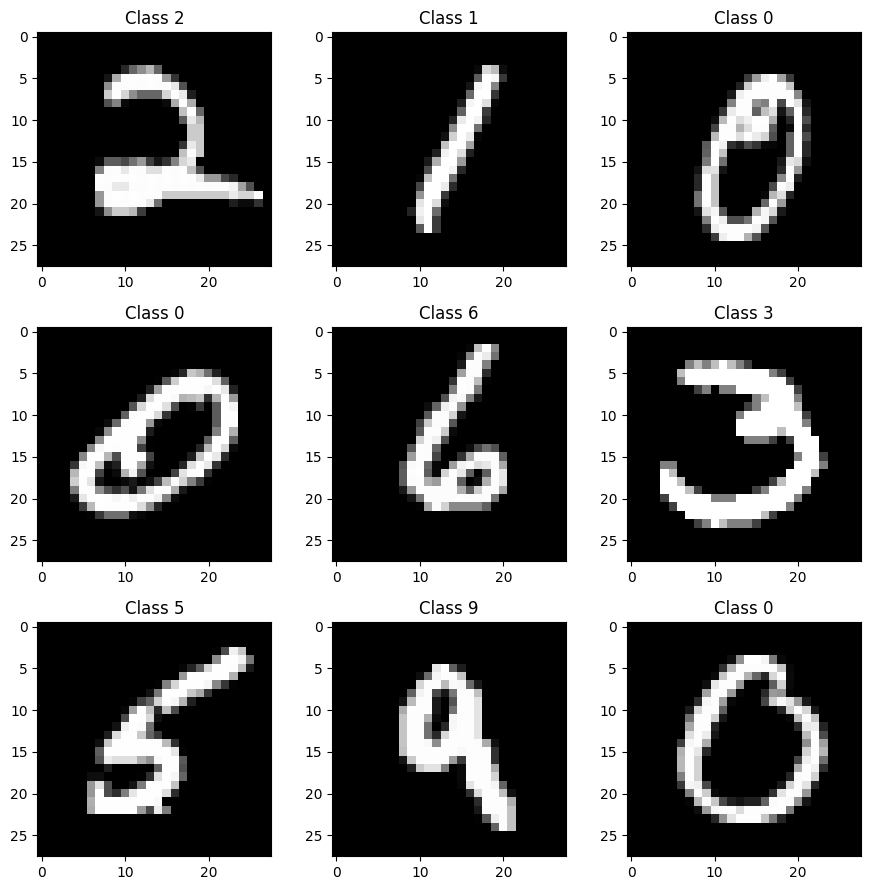

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

Printing a 28 x 28 matrix with numbers corresponding to the colors found on each numbers plot (0 being Black, 253 being White)

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
matprint(X_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0   13  144  255  255  245  121    8    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0   48  183  253  253  253  253  253  197    8    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0   10  200  253  253  178  101   41  215  253   10    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0   14  232  253  253  154    0    0    0   94  210    9    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0 

Reshaping the Data into 784 length vectors, convert to 32-bit floating numbers, and normalizing values per pixel.

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Convert Traning and Testing sets into Binary.

In [ ]:
y_train_binary = (y_train == 0).astype(int)
y_test_binary  = (y_test == 0).astype(int)

In [ ]:
Y_train = y_train_binary
Y_test = y_test_binary

## Step 3: Creating the Sequential Model

In [ ]:
# Create the Sequential Model

model = Sequential()

Creating Hidden and Output Layers

In [ ]:
# First Hidden Layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

Summarize the Model

In [ ]:
# Summarize the model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 927,745 (3.54 MB)

 Trainable params: 927,745 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Model Compilation and Training

Adam Optimizer for Learning & Binary Loss

In [ ]:
# Adam Optimizer for Learning and Binary Loss
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model Training

In [ ]:
model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9733 - loss: 0.0628 - val_accuracy: 0.9957 - val_loss: 0.0142
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9942 - val_loss: 0.0171
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 0.9975 - val_loss: 0.0067
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.9948 - val_loss: 0.0135
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9976 - loss: 0.0078 - val_accuracy: 0.9973 - val_loss: 0.0067
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9982 - val_loss: 0.0062
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9975 - val_loss: 0.0079
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9980 - loss: 0.0055 - 

Evaluate Accuracy on Test Data

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.01270674541592598
Test accuracy: 0.9958000183105469


Inspect Output

In [ ]:
predicted_probs = model.predict(X_test)
predicted_classes = (predicted_probs >= 0.5).astype(int).flatten()

y_test_binary = (y_test == 0).astype(int)

correct_indices = np.nonzero(predicted_classes == y_test_binary)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_binary)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


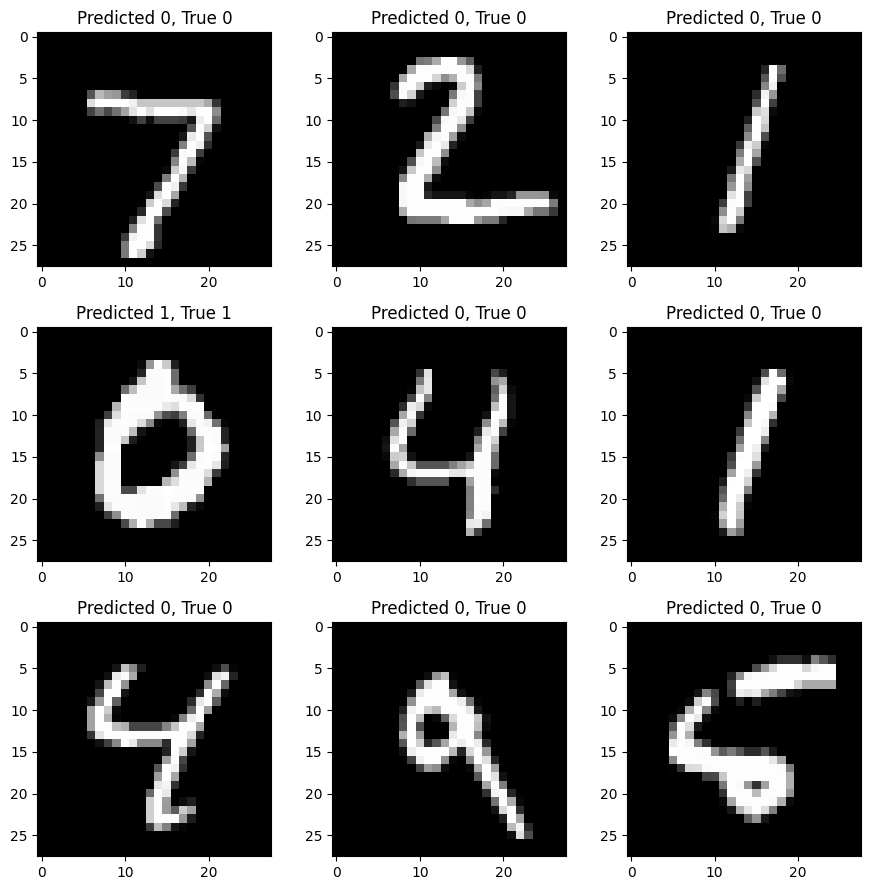

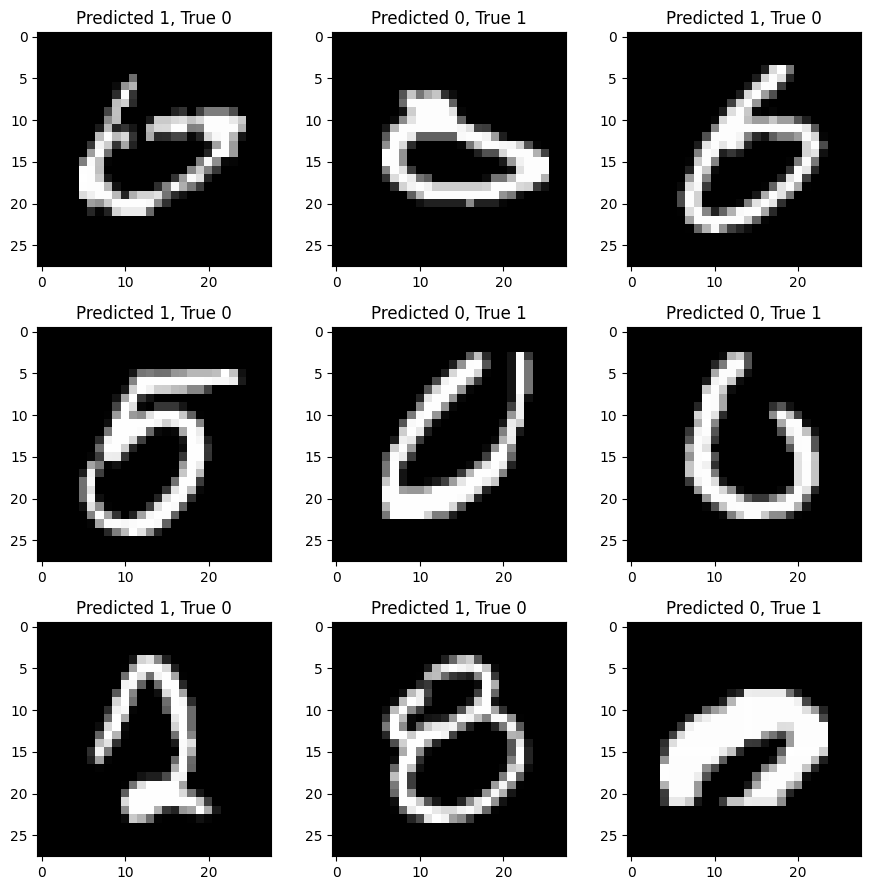

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
        "Predicted {}, True {}".format(
            predicted_classes[correct],
            y_test_binary[correct]
        )
    )

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
        "Predicted {}, True {}".format(
            predicted_classes[incorrect],
            y_test_binary[incorrect]
        )
    )

plt.tight_layout()